# 서울시 CCTV현황 분석 및 인구 현황 분석

### CCTV 설치현황

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul =  pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [4]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [5]:
# CCTV_Seoul의 첫번째 컬럼 확인
CCTV_Seoul.columns[0]

'기관명'

In [6]:
# 기관명 - > 구별로 변경
CCTV_Seoul.rename(columns={'기관명':'구별'},inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
# NaN을 확인하고 NaN을 0으로 대체하기
CCTV_Seoul.isnull().sum()

구별          0
소계          0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [8]:
CCTV_Seoul.fillna(value=0,inplace=True)

In [9]:
CCTV_Seoul.isnull().sum()

구별          0
소계          0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

In [10]:
population_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",header=3)
population_Seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
1,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
2,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
3,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
4,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728


In [11]:
population_Seoul.iloc[:,[1,3,6,9,13]].head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


---
### 인구현황

In [12]:
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx")
pop_Seoul.head()

,report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,기간,자치구,세대,인구,인구,인구,인구,인구,인구,인구,인구,인구,세대당인구,65세이상고령자
1,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
2,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
3,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
4,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073


In [13]:
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                          header=3,
                          usecols="B,D,G,J,N" 
                         )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [14]:
pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [15]:
pop_Seoul.drop(index=0,inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


### CCTV 현황

In [16]:
# CCTV에서 소계로 오름차순 정렬
CCTV_Seoul.sort_values(by='소계',ascending=True).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구, 중랑구, 강북구, 종로구, 중구 순이다.

In [17]:
# CCTV에서 소계로 내림차순 정렬
CCTV_Seoul.sort_values(by='소계',ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV댓수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

In [18]:
CCTV_Seoul.iloc[:,7:10].sum(axis=1)

0     1790
1      852
2      574
3      708
4     1984
5      835
6     1352
7      865
8      564
9      343
10     566
11     787
12     926
13     886
14     995
15    1428
16    1316
17     612
18    1316
19    1453
20     222
21     892
22     530
23     915
24     196
dtype: int64

In [19]:
CCTV_Seoul.iloc[:,2:10].sum(axis=1)

0     5221.0
1     1879.0
2     1265.0
3     1617.0
4     3985.0
5     1581.0
6     3227.0
7     1634.0
8     1906.0
9      858.0
10    2003.0
11    1780.0
12    1935.0
13    2121.0
14    2835.0
15    2679.0
16    3003.0
17    1586.0
18    2775.0
19    2495.0
20    2063.0
21    2962.0
22    1471.0
23    1544.0
24    1068.0
dtype: float64

In [20]:
#### 최근 3년간 CCTV 증가율을 구해서 CCTV가 제일 많이 증가한 구를 검색 후 정렬

CCTV_Seoul['최근증가율'] = CCTV_Seoul.iloc[:,7:10].sum(axis=1) / CCTV_Seoul.iloc[:,2:7].sum(axis=1) * 100
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [21]:
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간의 CCTV가 2015년 이전에 비해 가장 많이 증가한 곳은 중구, 영등포구, 성동구, 금천구, 광진구 순이다

---
### 인구현황

In [22]:
# 구별 Data의 유효성 확인
len(pop_Seoul['구별'].unique())

25

In [23]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [24]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [25]:
# 인구수가 제일 많은 지역은 Top5
pop_Seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [26]:
# 외국인이 제일 많은 지역은 Top5
pop_Seoul.sort_values(by='외국인',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [27]:
# 외국인 비율이 제일 많은 지역은 Top5
pop_Seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [28]:
# 고령자 정렬
pop_Seoul.sort_values(by='고령자',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [29]:
# 고령자 비율 정렬
pop_Seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


> -- 정렬 데이터로 알 수 있는 내용(3조) --       
>
> 영등포구가 외국인인구수, 외국인 비율이 가장 높게 나타나는 경향을 보인다.   
>   
> 영등포구, 금천구, 구로구는 외국인 인구수와 외국인비율이 높게 나타나는 경향을 보인다.
>
> 은평구를 제외한 나머지 구는 고령자인구와 고령자비율이 비례하지 않는다.     
> 
> 인구수가 많은 상위 다섯개 구 중에 4개의 구가 고령자수가 높게 나타나는 경향을 보인다.    
> (즉 인구수와 고령자수는 비례관계를 보인다.)      
>      
> 고령자 비율은 강북지역이 높다.      
>
> 인구수 상위 5개 지역구 중 4군데가 강남지역이다.

> -- 강사님 --      
>   
>   
> 인구수가 제일 많은 지역은 송파구이지만 영등포구가 제일 외국인이 많다.     
> 
> 그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많다.     
> 
> 송파구는 고령자가 제일 많지만 고령자의 비율이 높지 않은 것이 확인된다.      
> 
> 하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는 인구수 대비 고령자 비율이 많기 때문에     
> 추후 고령화가 우려된다. 


---
# CCTV와 인구현황 합치기

In [30]:
data_result = pd.merge(CCTV_Seoul,pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [31]:
# sol 1 )
data_result.drop(columns=data_result.iloc[:,2:10],inplace=True)

In [32]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [33]:
# sol 2 ) 
# delColumn = data_result.columns[2:10]

# for i in delColumn:
#     del data_result[i]
# data_result.head()

In [34]:
data_result.set_index(keys='구별',inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [35]:
import numpy as np

In [36]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [37]:
# 고령자와 소계의 상관계수
np.corrcoef(data_result['고령자'],data_result['소계'])

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

> 고령자와 CCTV 개수와 상관이 없다 => 젋은층이 많은 지역에 CCTV가 많다.

In [38]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [39]:
# 외국인과 소계의 상관계수
np.corrcoef(data_result['외국인'],data_result['소계'])

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

> 외국인과 CCTV 개수와 상관이 없다

In [40]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 인구수와 CCTV 개수와 상관이 있다

> 고령자 비율의 상관계수를 보면 역상관이 발생하고 이는 고령자가 아닌 젋은층 비율이 높은 곳에 CCTV가 많이 설치되는 경향을 보이며 
> 주로 인구수와 양의 상관을 보이고 있어 CCTV 대수는 인구수에 비례하여 증가하는 경향을 보인다. 

---
# 시각화

In [41]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt 

In [42]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [43]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [44]:
# 파일로 저장(CCTV_Result.csv)

data_result.to_csv("../Data/CCTV_Result.csv")

In [55]:
CCTV_Result = pd.read_csv("../Data/CCTV_Result.csv")

In [56]:
result = CCTV_Result[['구별','소계']]
result.set_index('구별',inplace=True)
result.head()

,소계
구별,
강남구,5221
강동구,1879
강북구,1265
강서구,1617
관악구,3985


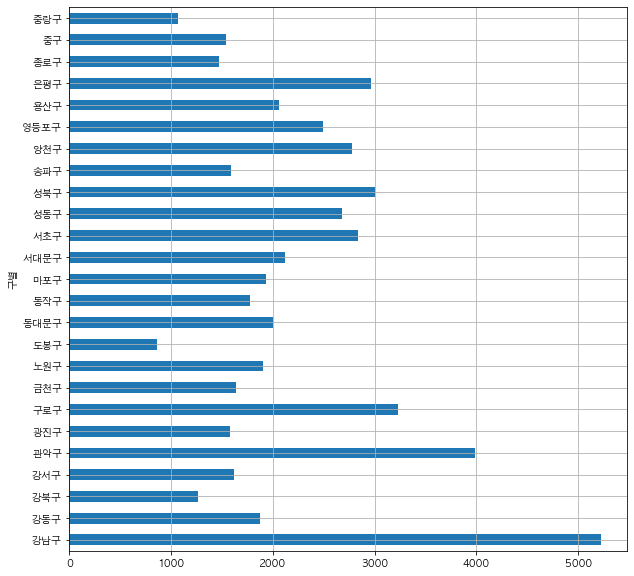

In [57]:
plt.rcParams['figure.figsize'] = (10,10)
result['소계'].plot(
    kind = 'barh'
)
plt.grid()
plt.show()

In [58]:
result = result.sort_values(by='소계')

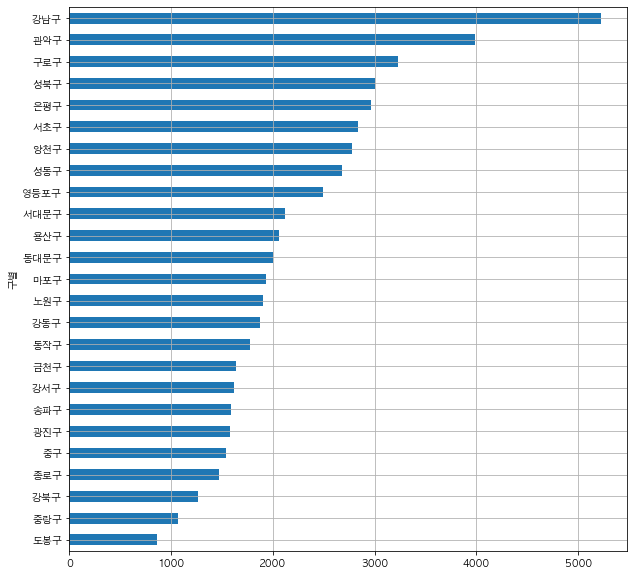

In [62]:
result['소계'].plot(
    kind = 'barh',
    grid = True,
    figsize = (10,10),
)
plt.show()

### 인구대비 CCTV 비율

In [65]:
pop_CCTV = data_result[['소계','인구수']]
pop_CCTV.head()

,소계,인구수
구별,,
강남구,5221,549898
강동구,1879,457042
강북구,1265,316750
강서구,1617,595703
관악구,3985,516662


In [70]:
pop_CCTV['CCTV비율'] = (pop_CCTV['소계'] / pop_CCTV['인구수']) * 100 
pop_CCTV

/var/folders/51/xmc_l6t13wv1nc5z6qmyg58r0000gn/T/ipykernel_1730/2950622106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_CCTV['CCTV비율'] = (pop_CCTV['소계'] / pop_CCTV['인구수']) * 100


,소계,인구수,CCTV비율
구별,,,
강남구,5221,549898,0.949449
강동구,1879,457042,0.411122
강북구,1265,316750,0.399369
강서구,1617,595703,0.271444
관악구,3985,516662,0.771297
광진구,1581,365990,0.431979
구로구,3227,438308,0.736240
금천구,1634,251370,0.650038
노원구,1906,535495,0.355932


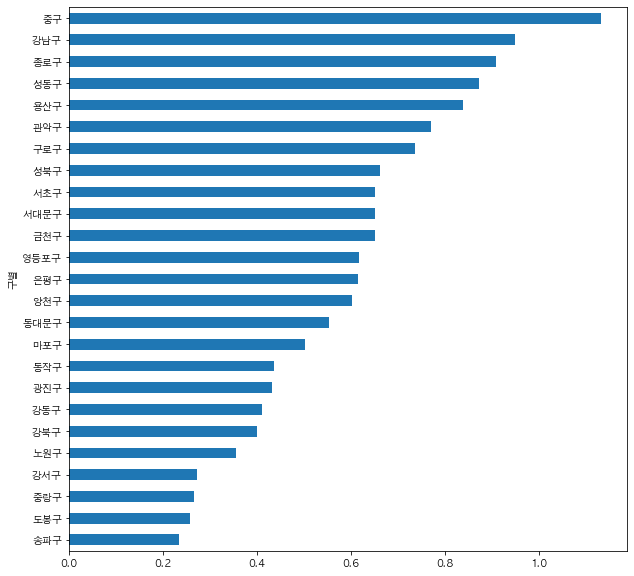

In [97]:
pop_CCTV['CCTV비율'].sort_values().plot(
    kind = 'barh',
)
plt.show()

> 중구가 CCTV 대수는 가장 적으나 인구대비 CCTV 비율이 가장 높게 나타난다. <br>
> 강남구가 CCTV 대수가 가장 높게 나타나고 비율 또한 2번째로 가장 높게 나타난다. <br>
> 강북구, 도봉구 는 고령자비율이 가장 높지만, CCTV 비율은 밑에서 6번째, 2번째로 낮게 나타난다. <br>


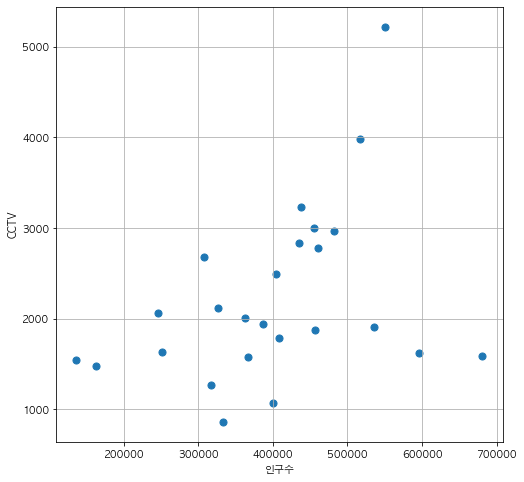

In [90]:
# 산점도를 이용한 시각화 (인구수와 소계)
pop_CCTV[['소계','인구수']].plot(
    x = '인구수',
    y = '소계',
    kind = 'scatter',
    grid = True,
    s = 50,
    figsize = (8,8)

)
plt.ylabel('CCTV')
plt.show()

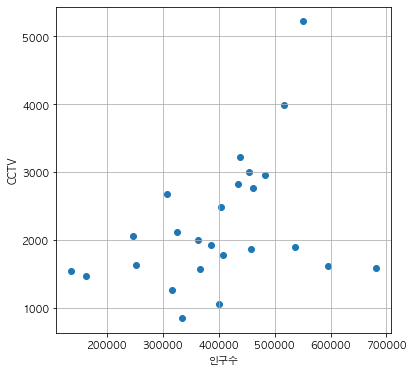

In [98]:
# 강사님 코드
plt.figure(figsize=(6,6))
plt.scatter(pop_CCTV['인구수'],pop_CCTV['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [99]:
# 인구수,소계에 따른 기준직선(회귀선, 평균선) 만들기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([2.88522756e-03, 1.06403852e+03])

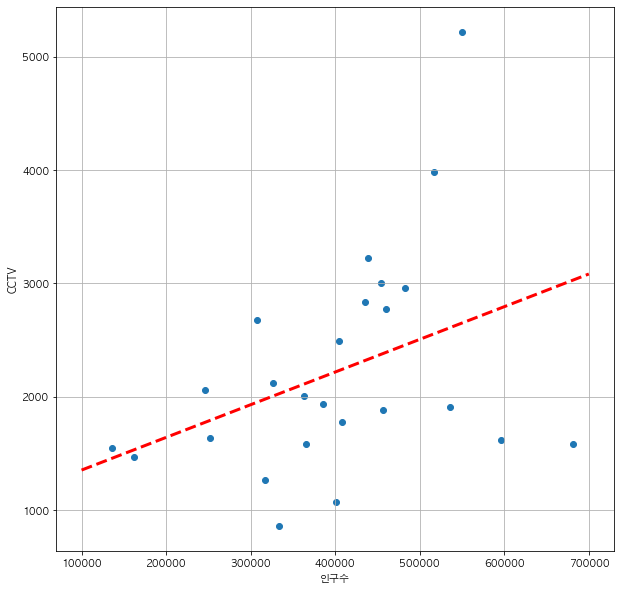

In [104]:
# x축 만들기 : 인구수 표현
fx = np.linspace(100000,700000)

# y축 만들기 : CCTV 소계 표현
f1 = np.poly1d(fp1)  # fp1에 의해 만들어진 회귀식 

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'])
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r') # 기준직선 그려주기
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

> 이 직선은 CCTV 댓수에 기준값이 됩니다.<br>     
> 이 직선을 기준으로 상위에 있는 점은 과하게 설치 된 것이고    
> 직선보다 하위에 있는 점은 인구수에 비해 CCTV가 부족하다는 해석이 됩니다.

In [108]:
# 기준선 구하기
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)

# 기준치 구하기
f1 = np.poly1d(fp1)

# 인구수
fx = np.linspace(100000,700000)

# 소계에서 기준인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))

# 정렬
df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237


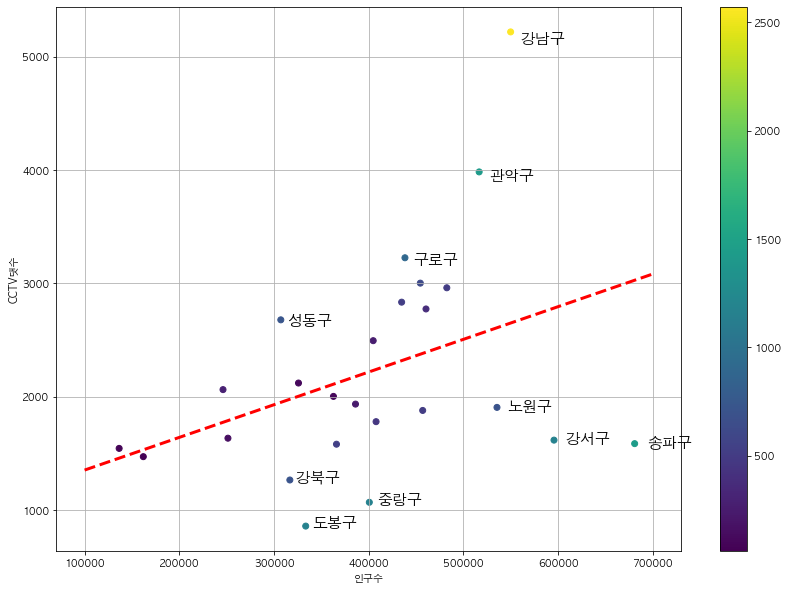

In [116]:
# 그래프에 텍스트와 Color
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'],c=data_result['오차'])
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='r')

# 오차가 가장 큰 10개구에 텍스트 붙이기
for n in range(10):
    plt.text(df_sort['인구수'][n]* 1.02,df_sort['소계'][n]*0.98,df_sort.index[n],fontsize=15)

plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.colorbar()
plt.grid()
plt.show()

> 기준선 주위의 색깔은 비슷하나 멀어질수록 색깔이 다르다.